In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif,chi2,f_regression,mutual_info_classif

In [2]:
sns.set(rc={'figure.figsize':(12,8)})

In [3]:
data = pd.read_csv('train_1.csv')
data= data.drop(['PassengerId','Cabin_Codes'],axis=1)

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Total_Members', 'Title', 'Age_Group', 'Multiply',
       'fare_per_person', 'Alone'],
      dtype='object')

In [5]:
cat_colms = []
num_colms = set(data.columns)-set(cat_colms)
num_colms = list(num_colms)

In [6]:
set(data.columns)-set(cat_colms)

{'Age_Class',
 'Age_Group',
 'Alone',
 'Embarked',
 'Fare_Group',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Title',
 'Total_Members',
 'fare_per_person'}

# (Numerical Input, Numerical Output)
 A test regression problem is prepared using the make_regression() function.

 Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

[Text(0, 0.5, 'Corr'), Text(0.5, 0, 'Feature')]

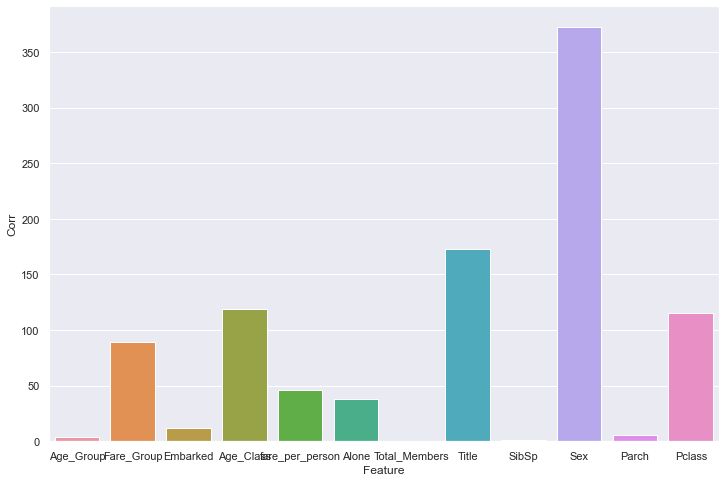

In [7]:
fs = SelectKBest(score_func=f_regression,k=5)
res = fs.fit_transform(X=data[num_colms].drop('Survived',axis=1),y=data['Survived'])
fig = sns.barplot(x=data[num_colms].drop('Survived',axis=1).columns,y=fs.scores_ ,) 
fig.set(xlabel='Feature',ylabel='Corr')

# (Numerical Input, Categorical Output)
 A test regression problem is prepared using the make_classification() function.

 Feature selection is performed using ANOVA F measure via the f_classif() function.

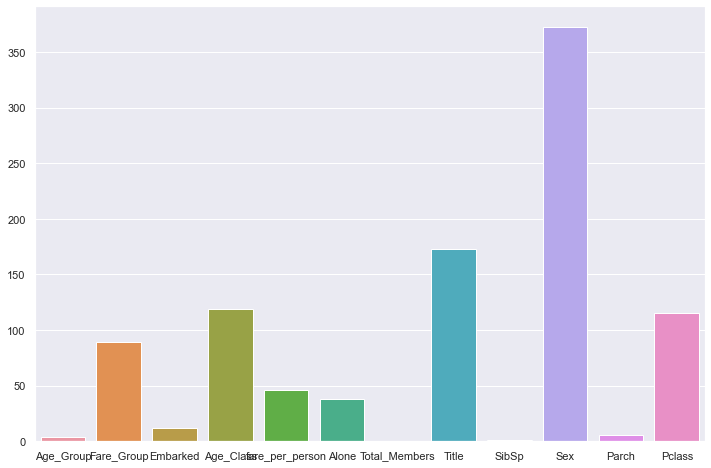

In [8]:
fs = SelectKBest(score_func=f_classif,k=4)
res = fs.fit_transform(X=data[num_colms].drop('Survived',axis=1),y=data['Survived'])
sns.barplot(x=data[num_colms].drop('Survived',axis=1).columns,y=fs.scores_ ) 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for x in cat_colms:
    encoder = LabelEncoder()
    data[x] = encoder.fit_transform(data[x])

# (Categorical Input, Categorical Output)
The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

* Chi-Squared test (contingency tables).




In [12]:
fs = SelectKBest(score_func=chi2,k='all')
res = fs.fit_transform(X=data[num_colms],y=data['Survived'])
sns.barplot(x=cat_colms,y=fs.scores_)

ValueError: No group keys passed!

* **Mutual Information.** _( larger is better)_

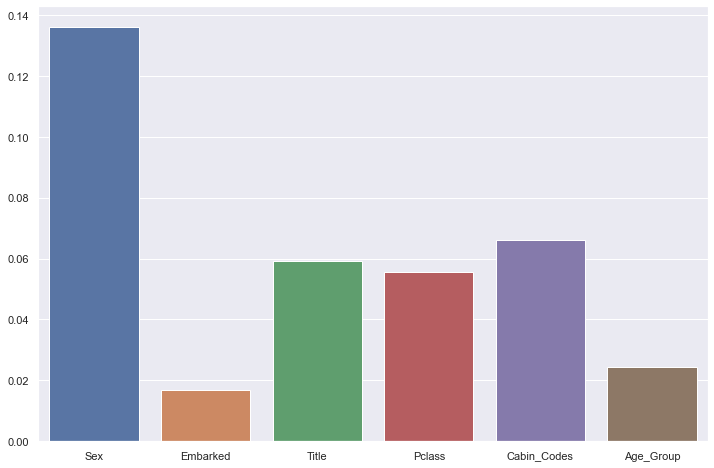

In [40]:
fs = SelectKBest(score_func=mutual_info_classif,k='all')
res = fs.fit_transform(X=data[cat_colms],y=data['Survived'])
sns.barplot(x=cat_colms,y=fs.scores_)